In [2]:
#Dependencies for analysis with pandas and numpy
import pandas as pd
import numpy as np

#Dependencies for graphs
import seaborn as sns
import matplotlib.pyplot as plt

#Dependencies for plotly
#import plotly.graph_objs as plotly
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)

#Dependencies for stat analysis with sklearn
#from sklearn.feature_extraction.text import CountVectorizer 
#from sklearn.model_selection import train_test_split


In [3]:
#Import data
wine_df = pd.read_csv('winemag-data_first150k.csv')
wine_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [48]:
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('fivethirtyeight')
#import matplotlib.pyplot as plt

C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Grace\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Grace\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Grace\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Grace\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\U

In [37]:
import sqlalchemy
from sqlalchemy import create_engine, MetaData, inspect, func
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session



In [17]:
!rm wine.sqlite 

rm: cannot remove 'wine.sqlite': Device or resource busy


In [18]:
engine=create_engine("sqlite:///wine.sqlite")

In [19]:
conn=engine.connect()

In [20]:
Base = declarative_base()

In [21]:
class Wine(Base):
    __tablename__='wine'
    id = Column(Integer, primary_key=True)
    country = Column(String)
    description= Column(String)
    designation= Column(String)
    points= Column(Numeric)
    price= Column(Numeric)
    province= Column(String)
    region_1= Column(String)
    region_2= Column(String)
    variety= Column(String)
    winery= Column(String)
    
    def __repr__(self):
        return f"id={self.id}, description={self.description}"

In [22]:
Base.metadata.create_all(engine)

In [23]:
wine_data=wine_df.to_dict(orient='records')

In [24]:
print(wine_data[:5])

[{'Unnamed: 0': 0, 'country': 'US', 'description': 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tannins and a subtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.', 'designation': "Martha's Vineyard", 'points': 96, 'price': 235.0, 'province': 'California', 'region_1': 'Napa Valley', 'region_2': 'Napa', 'variety': 'Cabernet Sauvignon', 'winery': 'Heitz'}, {'Unnamed: 0': 1, 'country': 'Spain', 'description': 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.', 'designation': 'Carodor

In [27]:
metadata=MetaData(bind=engine)
metadata.reflect()

In [28]:
table = sqlalchemy.Table('wine', metadata,autoload=True)

In [29]:
conn.execute(table.insert(), wine_data)
conn.execute("select * from wine limit 5").fetchall()

[(1, 'US', 'This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel  ... (57 characters truncated) ... ubtle minty tone in the background. Balanced and rewarding from start to finish, it has years ahead of it to develop further nuance. Enjoy 2022–2030.', "Martha's Vineyard", 96, 235, 'California', 'Napa Valley', 'Napa', 'Cabernet Sauvignon', 'Heitz'),
 (2, 'Spain', 'Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense an ... (20 characters truncated) ... alate, with rich flavors of chocolaty black fruits and baking spices. A toasty, everlasting finish is heady but ideally balanced. Drink through 2023.', 'Carodorum Selección Especial Reserva', 96, 110, 'Northern Spain', 'Toro', None, 'Tinta de Toro', 'Bodega Carmen Rodríguez'),
 (3, 'US', 'Mac Watson honors the memory of a wine once made by his mother i

In [32]:
inspector = inspect(engine)
columns = inspector.get_columns('wine')
for c in columns:
    print (c['name'], c['type'])

id INTEGER
country VARCHAR
description VARCHAR
designation VARCHAR
points NUMERIC
price NUMERIC
province VARCHAR
region_1 VARCHAR
region_2 VARCHAR
variety VARCHAR
winery VARCHAR


In [42]:
Base_auto = automap_base()
Base_auto.prepare(engine, reflect=True)
winebase=Base_auto.classes.wine


In [43]:
session=Session(engine)

In [44]:
wine_func = [winebase.country,
            func.avg(winebase.points),
            func.avg(winebase.price)]

In [45]:
wine_avg=session.query(*wine_func).group_by(winebase.country).order_by(winebase.country).all()

In [46]:
wine_avg

[(None, 84.6, 18.4),
 ('Albania', 88.0, 20.0),
 ('Argentina', 85.9960930562955, 20.794880973688922),
 ('Australia', 87.89247528747227, 31.258479771148345),
 ('Austria', 89.27674190382729, 31.192106322996377),
 ('Bosnia and Herzegovina', 84.75, 12.75),
 ('Brazil', 83.24, 19.92),
 ('Bulgaria', 85.46753246753246, 11.545454545454545),
 ('Canada', 88.23979591836735, 34.628865979381445),
 ('Chile', 86.29676753782668, 19.344779743322928),
 ('China', 82.0, 20.333333333333332),
 ('Croatia', 86.28089887640449, 23.10843373493976),
 ('Cyprus', 85.87096774193549, 15.483870967741936),
 ('Czech Republic', 85.83333333333333, 18.0),
 ('Egypt', 83.66666666666667, None),
 ('England', 92.88888888888889, 47.5),
 ('France', 88.92586975068727, 45.61988501859993),
 ('Georgia', 85.51162790697674, 18.58139534883721),
 ('Germany', 88.62642740619903, 39.011077971879),
 ('Greece', 86.11764705882354, 21.74770642201835),
 ('Hungary', 87.32900432900433, 44.20434782608696),
 ('India', 87.625, 13.875),
 ('Israel', 87.1

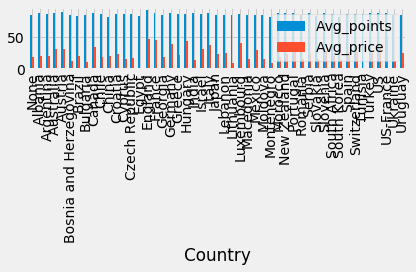

In [47]:
df=pd.DataFrame(wine_avg, columns=["Country","Avg_points","Avg_price"])
df.set_index("Country",inplace=True)
df.plot.bar()
plt.tight_layout()
plt.show()